# Titanic - Machine Learning from Disaster

**Description:** This notebook use the Titanic datasets, performs exploratory data analysis (EDA) using pandas and SQL enviroment, builds a machine learning model using RandomForestClassifier, and creates a submission file for the competition.

**Author:** Kevin Juan Román Rafaele

**Date:** 2024-07-23

**License:** MIT License

**GitHub:** https://github.com/PoppinElo/Titanic-ML-v1

## Import Libraries

In [1]:
import requests
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Exploring the Dataset

**Load datasets from paths**

In [2]:
train_df = pd.read_csv('/content/titanic/train.csv')
test_df = pd.read_csv('/content/titanic/test.csv')
gsubmission_df = pd.read_csv('/content/titanic/gender_submission.csv')

**Display the first few rows of the train dataset**

In [3]:
print("Train Dataset:")
train_df.head()

Train Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Display the first few rows of the test dataset**

In [4]:
print("\nTest Dataset:")
test_df.head()


Test Dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Display the first few rows of the gender submission dataset**

In [5]:
print("\nGender submission Dataset:")
gsubmission_df.head()


Gender submission Dataset:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Querying with SQL

**Create an SQLite database in memory**

In [31]:
conn = sqlite3.connect(':memory:')

**Load DataFrames into SQLite database**

In [32]:
train_df.to_sql('train', conn, index=False, if_exists='replace')
test_df.to_sql('test', conn, index=False, if_exists='replace')

418

**Example SQL query: Get the first 20 passengers in the training set**

In [34]:
query = '''
SELECT * FROM train
ORDER BY Age
LIMIT 20
'''

# Execute the query
data_f20 = pd.read_sql_query(query, conn)
print("\nFirst 10 Rows:")
print(data_f20)


First 10 Rows:
    Pclass  Sex   Age  SibSp  Parch      Fare  Survived
0        3    0  0.42      0      1    8.5167         1
1        2    0  0.67      1      1   14.5000         1
2        3    1  0.75      2      1   19.2583         1
3        3    1  0.75      2      1   19.2583         1
4        2    0  0.83      0      2   29.0000         1
5        2    0  0.83      1      1   18.7500         1
6        1    0  0.92      1      2  151.5500         1
7        3    0  1.00      4      1   39.6875         0
8        3    1  1.00      1      1   11.1333         1
9        2    0  1.00      2      1   39.0000         1
10       3    1  1.00      0      2   15.7417         1
11       3    0  1.00      5      2   46.9000         0
12       3    0  1.00      1      2   20.5750         1
13       2    0  1.00      0      2   37.0042         1
14       3    0  2.00      3      1   21.0750         0
15       3    0  2.00      4      1   29.1250         0
16       3    1  2.00      4    

**Example SQL query: Get the average age of passengers in the training set**

In [35]:
query = '''
SELECT AVG(Age) as average_age
FROM train
WHERE Age IS NOT NULL
'''

# Execute the query
average_age = pd.read_sql_query(query, conn)
print("\nAverage Age of Passengers:")
print(average_age)


Average Age of Passengers:
   average_age
0    29.699118


**Example SQL query: Get the average age of passangers grouped by PClass in the training set**

In [10]:
query = '''
SELECT Pclass, AVG(Age) as average_age
FROM train
WHERE Age IS NOT NULL
GROUP BY Pclass
'''

# Execute the query
data_avg_age_group_class = pd.read_sql_query(query, conn)
print("\nAverage Age of Passengers Grouped by PClass:")
print(data_avg_age_group_class)


Average Age of Passengers Grouped by PClass:
   Pclass  average_age
0       1    38.233441
1       2    29.877630
2       3    25.140620


**Example SQL query: Get the number of passengers of one sex or another grouped by PClass in the training set**

In [36]:
query = '''
SELECT Pclass, Sex, COUNT(*) as count
FROM train
GROUP BY Pclass, Sex
'''

# Execute the query
data_count_sex_group_class = pd.read_sql_query(query, conn)
print("\nNumber of Passengers of One Sex or Another Grouped by PClass:")
print(data_count_sex_group_class)


Number of Passengers of One Sex or Another Grouped by PClass:
   Pclass  Sex  count
0       1    0    101
1       1    1     85
2       2    0     99
3       2    1     74
4       3    0    253
5       3    1    102


**Example SQL query: Get the the number of first, second, third and fourth age passengers who survived and who died, grouped by man and woman, order by age in the training set**
- first age is between 0 and 18 years old
- second age is between 18 and 40 years old
- third age is between 40 and 65 years old
- fourth age is from 65

In [12]:
query = '''
SELECT
    CASE
        WHEN Age BETWEEN 0 AND 18 THEN 'First Age'
        WHEN Age BETWEEN 18 AND 40 THEN 'Second Age'
        WHEN Age BETWEEN 40 AND 65 THEN 'Third Age'
        ELSE 'Fourth Age'
        END AS Age_Group,
    Sex,
    SUM(CASE WHEN Survived = 1 THEN 1 ELSE 0 END) AS Survived,
    SUM(CASE WHEN Survived = 0 THEN 1 ELSE 0 END) AS Died
FROM train
GROUP BY Age_Group, Sex
ORDER BY Age
'''

# Execute the query
data_count_age_group_sex = pd.read_sql_query(query, conn)
print("\nNumber of First, Second, Third and Fourth Age Passengers Who Survived and Who Died, Grouped by Man and Woman:")
print(data_count_age_group_sex)


Number of First, Second, Third and Fourth Age Passengers Who Survived and Who Died, Grouped by Man and Woman:
    Age_Group     Sex  Survived  Died
0  Fourth Age  female        36    17
1  Fourth Age    male        17   115
2   First Age    male        24    47
3   First Age  female        46    22
4  Second Age    male        51   229
5  Second Age  female       114    31
6   Third Age    male        17    77
7   Third Age  female        37    11


**Close the SQLite connection**

In [13]:
conn.close()

## Visualization of the Dataset

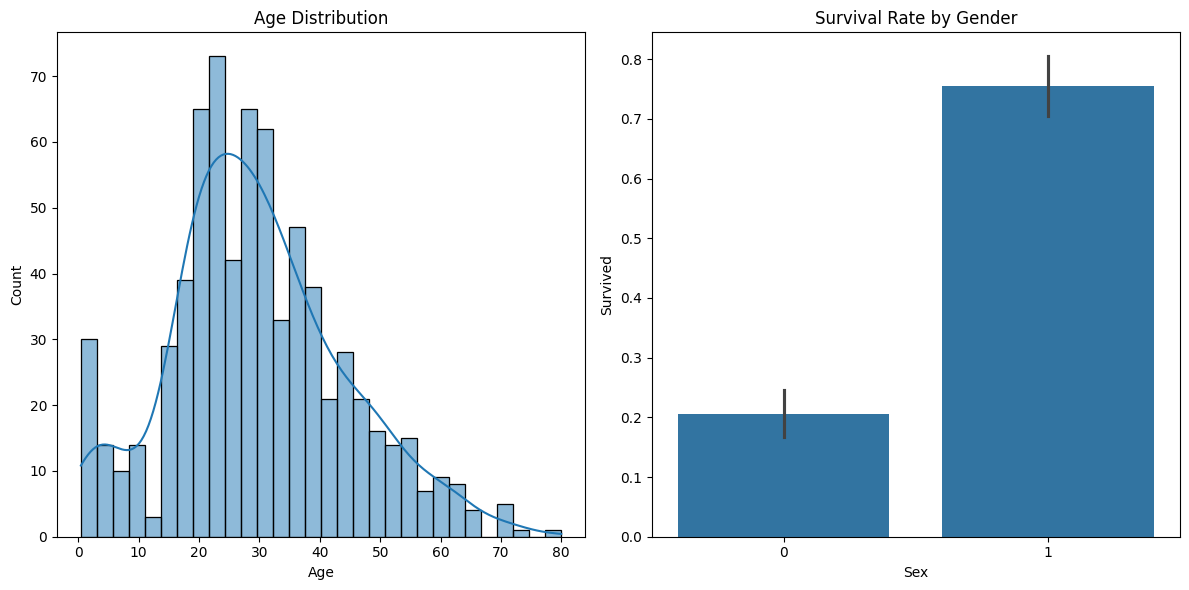

In [37]:
# Visualization of the dataset
plt.figure(figsize=(12, 6))

# Plot the distribution of ages
plt.subplot(1, 2, 1)
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')

# Plot survival rate by gender
plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')

plt.tight_layout()
plt.show()

## Modeling of the Dataset

**Prepare data for modeling**

In [38]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df = train_df[features + ['Survived']].dropna()
X = train_df[features]
y = train_df['Survived']

**Split the data into training and validation sets**

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

**Train a RandomForest model**

In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Predict on the validation set**

In [41]:
y_pred = model.predict(X_val)

**Evaluate the model**

In [42]:
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        87
           1       0.74      0.70      0.72        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143


Confusion Matrix:
[[73 14]
 [17 39]]


**Visualize the feature importances**

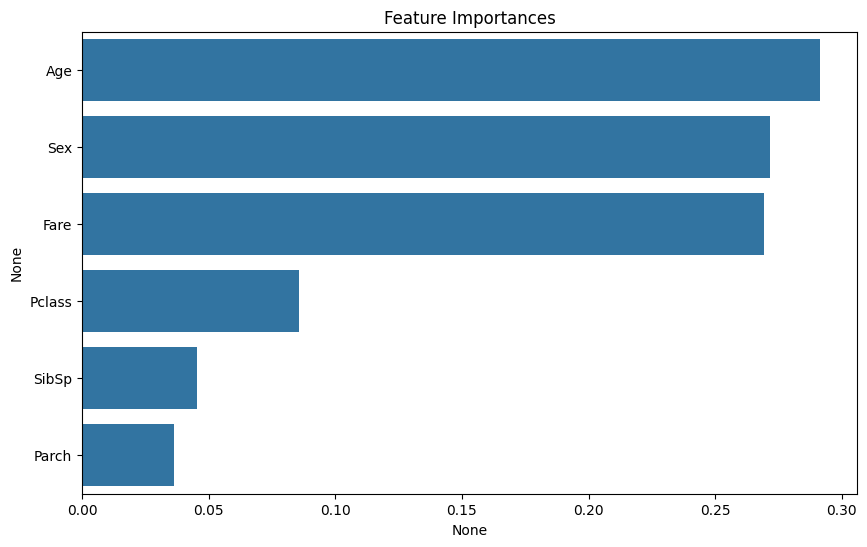

In [20]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

## Preparing the Submission

**Prepare test data for prediction**

In [21]:
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df = test_df[features].fillna(-1)

**Predict on the test dataset**

In [43]:
test_predictions = model.predict(test_df)

**Create a submission DataFrame**

In [27]:
submission_df = pd.DataFrame({
    'PassengerId': test_df.index + 892,  # Assuming test dataset indices start at 0
    'Survived': test_predictions
})

**Ensure correct format and save to CSV**

In [28]:
submission_df.to_csv('submission.csv', index=False)

print("\nSubmission File Preview:")
print(submission_df.head())


Submission File Preview:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
